<font size="5"><b>Case Study II</b><br><br>
Module 14 Model Selection and Boosting
 </font>

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,KFold,cross_validate,cross_val_score,cross_val_predict,GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier

In [17]:
data = pd.read_csv('glass.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [18]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [19]:
data.dropna()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [20]:
unique,count=np.unique(data.Type,return_counts=True)
#dict(zip(unique,count))
key=['Type '+str(i) for i in unique]

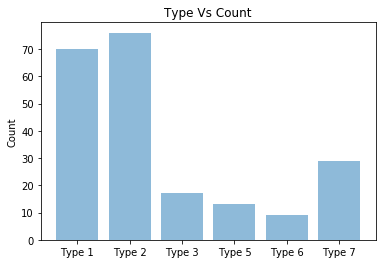

In [21]:
plt.bar(key,count, alpha=0.5)
y_pos = np.arange(len(key))
plt.xticks(y_pos, key)
plt.ylabel('Count')
plt.title('Type Vs Count')
plt.show()

In [22]:
x=data.iloc[:,0:9]
y=data.Type
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=0,test_size=.30)

In [23]:
decision_tree=DecisionTreeClassifier()

In [24]:
decision_tree.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
y_predict = decision_tree.predict(test_x)

In [26]:
print('Accuracy of this model is : ',metrics.accuracy_score(y_predict,test_y))

Accuracy of this model is :  0.6461538461538462


In [27]:
kf = KFold(n_splits=3)

In [28]:
print(cross_val_score(decision_tree,x,y,cv=kf,scoring='accuracy'))

[0.01388889 0.18309859 0.01408451]


In [32]:
rfc= RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=5, oob_score = True)

param_grid = { 
    'n_estimators': [20, 71],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(x,y)
print (CV_rfc.best_params_)



C:\Users\Senjuti\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Senjuti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Senjuti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Senjuti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Senjuti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: Run

{'max_features': 'sqrt', 'n_estimators': 71}
